Installing required packages and libraries

In [ ]:
!pip install seaborn pandas matplotlib numpy scikit-learn

Importing packages and libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

---

# Insurance Cost Analysis


In [ ]:
import requests

# Download the file using requests
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
filename = 'insurance.csv'

response = requests.get(url)
with open(filename, 'wb') as file:
    file.write(response.content)

# Load the CSV file into a pandas DataFrame
import pandas as pd
df = pd.read_csv(filename)

print(df.head())

   19  1    27.9  0 1.1  3    16884.924
0  18  2  33.770  1   0  4   1725.55230
1  28  2  33.000  3   0  4   4449.46200
2  33  2  22.705  0   0  1  21984.47061
3  32  2  28.880  0   0  1   3866.85520
4  31  1  25.740  0   ?  4   3756.62160


## Adding headers

In [ ]:
headers = ["Age", "Gender", "BMI", "No_of_children", "Smoker", "Region", "Charges"]
df.columns = headers

df.replace('?', np.nan, inplace = True)

print(df.head())

  Age  Gender     BMI  No_of_children Smoker  Region      Charges
0  18       2  33.770               1      0       4   1725.55230
1  28       2  33.000               3      0       4   4449.46200
2  33       2  22.705               0      0       1  21984.47061
3  32       2  28.880               0      0       1   3866.85520
4  31       1  25.740               0    NaN       4   3756.62160


## Get the information of the dataset

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2767 non-null   object 
 1   Gender          2771 non-null   int64  
 2   BMI             2771 non-null   float64
 3   No_of_children  2771 non-null   int64  
 4   Smoker          2764 non-null   object 
 5   Region          2771 non-null   int64  
 6   Charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


## Data Wrangling

In [ ]:
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['Smoker'].value_counts().idxmax()
df["Smoker"].replace(np.nan, is_smoker, inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['Age'].astype('float').mean(axis=0)
df["Age"].replace(np.nan, mean_age, inplace=True)

# Update data types
df[["Age","Smoker"]] = df[["Age","Smoker"]].astype("int")

df[["Charges"]] = np.round(df[["Charges"]],2)

print(df.head())

print(df.info())

   Age  Gender     BMI  No_of_children  Smoker  Region   Charges
0   18       2  33.770               1       0       4   1725.55
1   28       2  33.000               3       0       4   4449.46
2   33       2  22.705               0       0       1  21984.47
3   32       2  28.880               0       0       1   3866.86
4   31       1  25.740               0       0       4   3756.62
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2771 non-null   int64  
 1   Gender          2771 non-null   int64  
 2   BMI             2771 non-null   float64
 3   No_of_children  2771 non-null   int64  
 4   Smoker          2771 non-null   int64  
 5   Region          2771 non-null   int64  
 6   Charges         2771 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB
None


<ipython-input-6-184e65ec0d64>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Smoker"].replace(np.nan, is_smoker, inplace=True)
<ipython-input-6-184e65ec0d64>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

## Exploratory Data Analysis

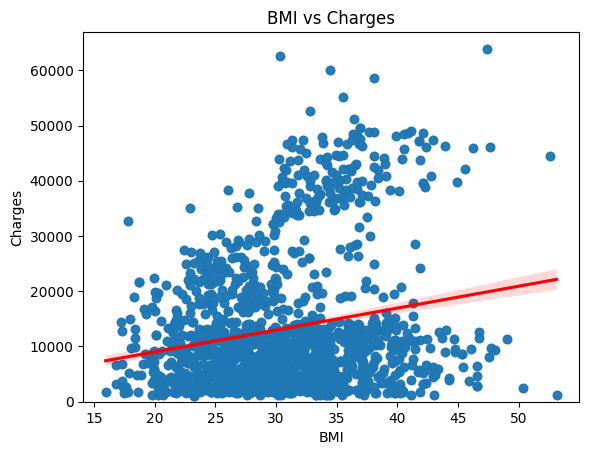

In [ ]:
#Regression plot for Charges with respect to BMI
sns.regplot(x="BMI", y="Charges", data=df, line_kws={"color": "red"})
plt.title("BMI vs Charges")
plt.ylim(0,)
plt.show()

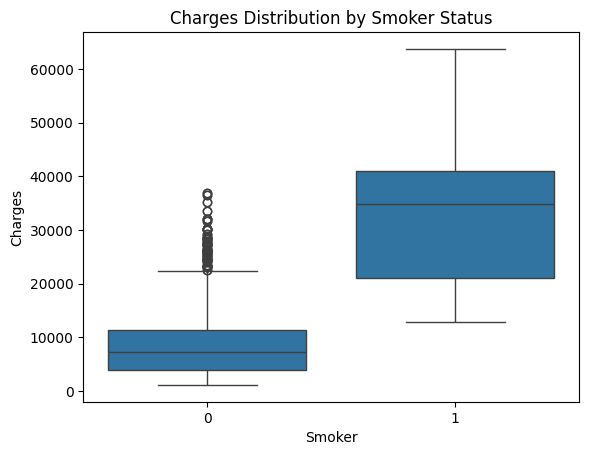

In [ ]:
#Box plot for Charges with respect to Smoker
sns.boxplot(x="Smoker", y="Charges", data=df)
plt.title("Charges Distribution by Smoker Status")
plt.show()

In [ ]:
#Correlation matrix for dataset
print(df.corr())

                     Age    Gender       BMI  No_of_children    Smoker  \
Age             1.000000 -0.026584  0.112859        0.037126 -0.022290   
Gender         -0.026584  1.000000  0.042766        0.015693  0.083125   
BMI             0.112859  0.042766  1.000000       -0.001642  0.011824   
No_of_children  0.037126  0.015693 -0.001642        1.000000  0.007016   
Smoker         -0.022290  0.083125  0.011824        0.007016  1.000000   
Region         -0.006969  0.022360  0.271200       -0.025594  0.053839   
Charges         0.298892  0.062959  0.199906        0.066551  0.789141   

                  Region   Charges  
Age            -0.006969  0.298892  
Gender          0.022360  0.062959  
BMI             0.271200  0.199906  
No_of_children -0.025594  0.066551  
Smoker          0.053839  0.789141  
Region          1.000000  0.054018  
Charges         0.054018  1.000000  


## Model Development

R^2 score: 0.6227430402464125


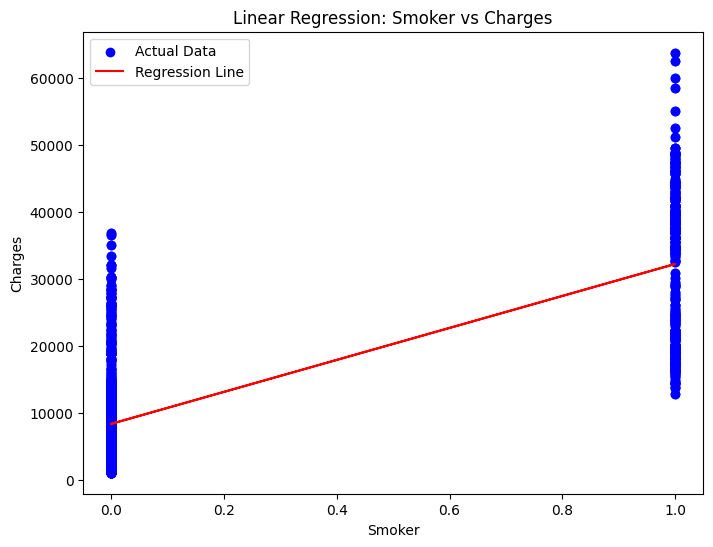

In [ ]:
# Fit the model
X = df[['Smoker']]  # Independent variable (Smoker)
Y = df['Charges']   # Dependent variable (Charges)

lm = LinearRegression()
lm.fit(X, Y)

# Get the model's predicted values
y_pred = lm.predict(X)

# Print the R^2 score
print(f'R^2 score: {lm.score(X, Y)}')

# Create the plot
plt.figure(figsize=(8, 6))

# Scatter plot of the original data
plt.scatter(X, Y, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(X, y_pred, color='red', label='Regression Line')

# Adding labels and title
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Linear Regression: Smoker vs Charges')

# Display the legend
plt.legend()

# Show the plot
plt.show()


R^2 score: 0.7505888664568174


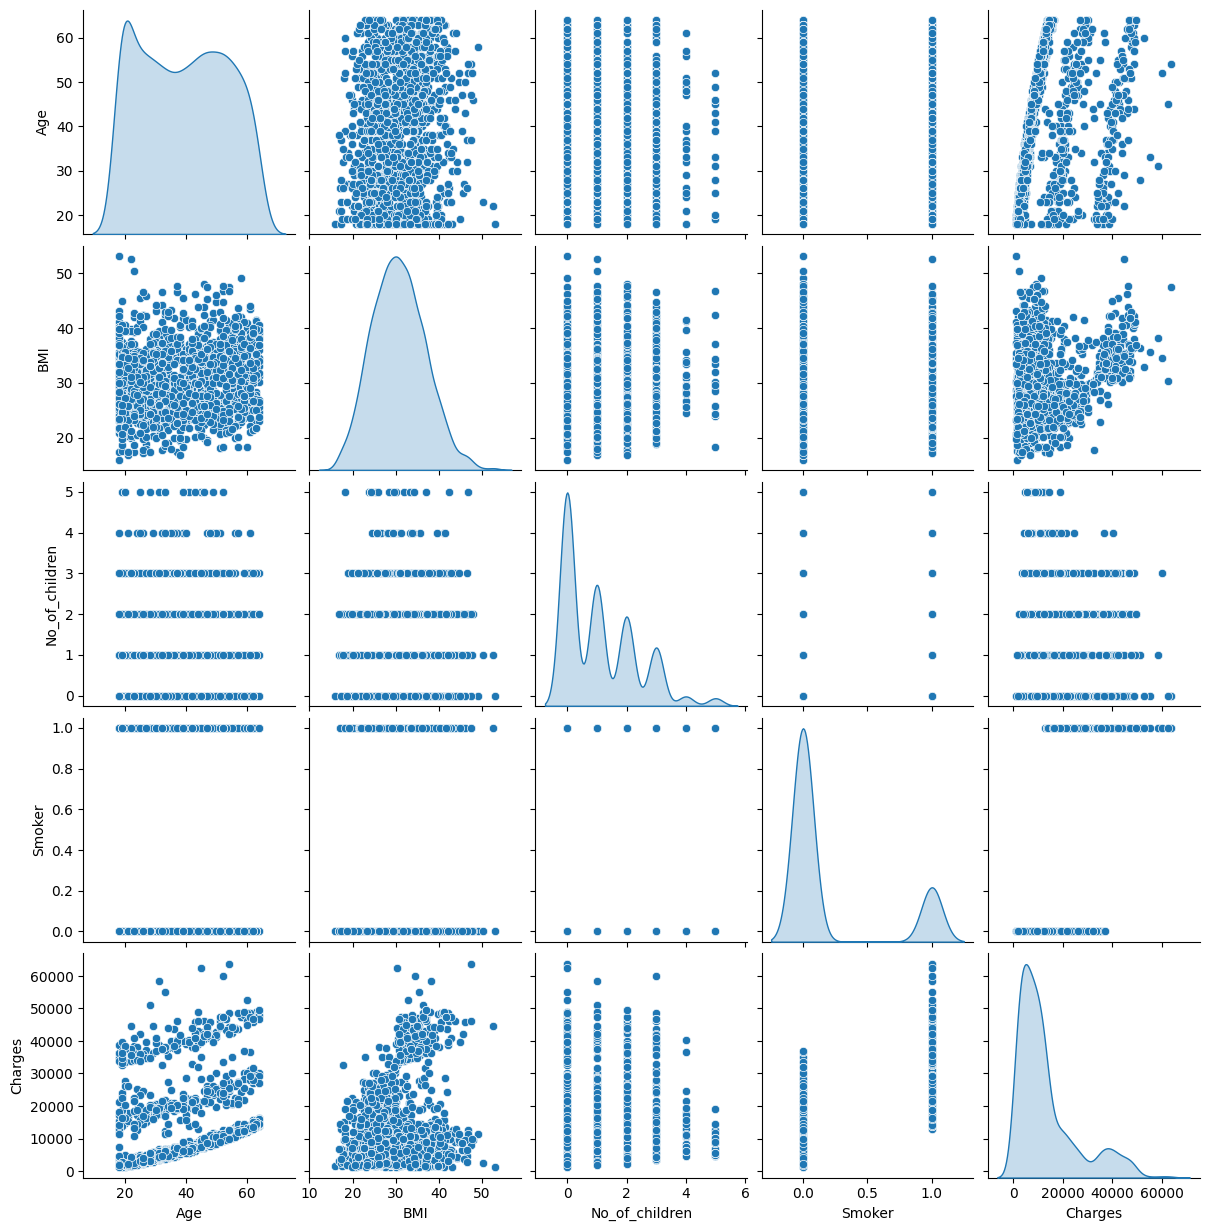

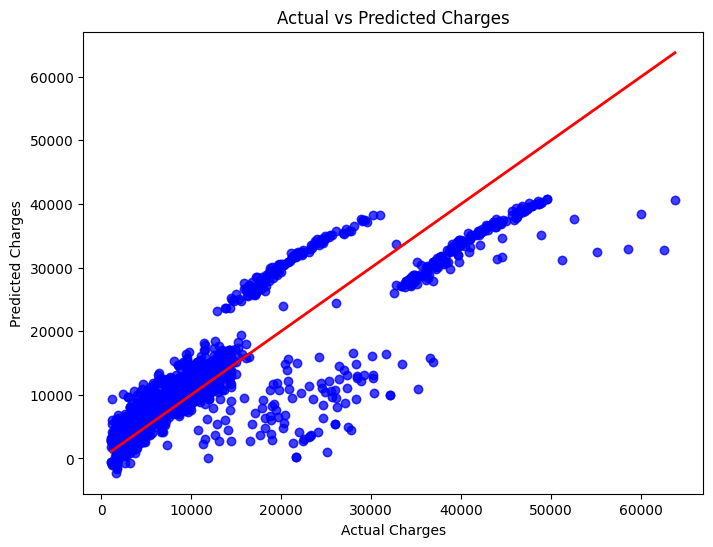

In [ ]:
# Select independent variables
Z = df[["Age", "Gender", "BMI", "No_of_children", "Smoker", "Region"]]
Y = df["Charges"]

# Fit the model
lm = LinearRegression()
lm.fit(Z, Y)

# Predict Y values
y_pred = lm.predict(Z)

# Print R^2 Score
print(f'R^2 score: {lm.score(Z, Y)}')

# 1. Pairplot to see relationships between variables
sns.pairplot(df[["Age", "BMI", "No_of_children", "Smoker", "Charges"]], diag_kind='kde')
plt.show()

# 2. Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(Y, y_pred, color='blue', alpha=0.5)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linewidth=2)  # Perfect Fit Line

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")

plt.show()

R^2 score: 0.8453719105568606


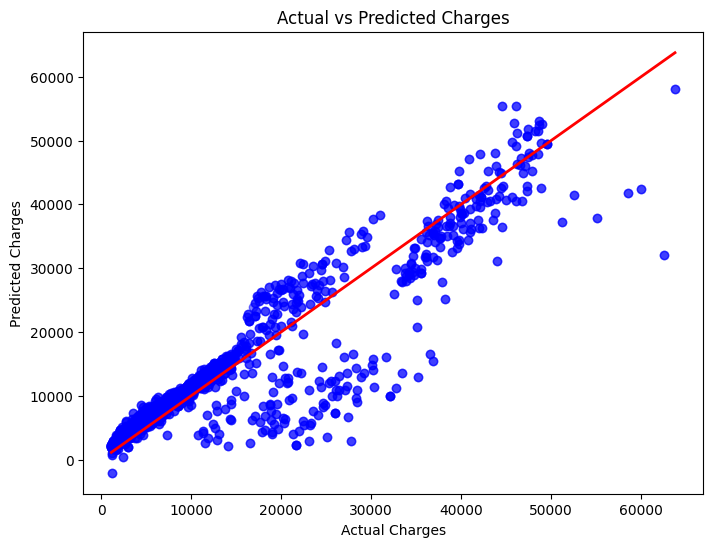

In [ ]:
# Define pipeline
Input = [('scale', StandardScaler()),
         ('polynomial', PolynomialFeatures(include_bias=False)),
         ('model', LinearRegression())]

pipe = Pipeline(Input)

# Convert Z to float
Z = Z.astype(float)

# Fit the model
pipe.fit(Z, Y)

# Predict values
ypipe = pipe.predict(Z)

# Print R^2 Score
print(f'R^2 score: {r2_score(Y, ypipe)}')

## 1. Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(Y, ypipe, color='blue', alpha=0.5)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linewidth=2)  # Perfect Fit Line

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()

## Model Refinement

Linear Ridge R²: 0.7254198858412229
Polynomial Ridge R²: 0.8208413195172478


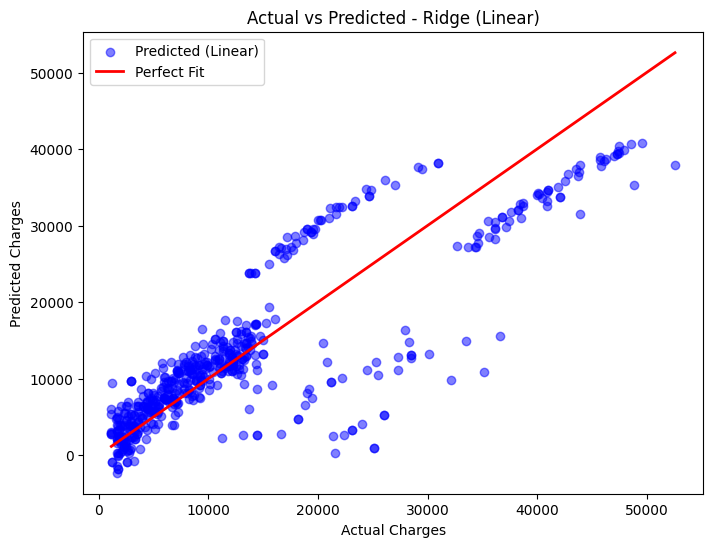

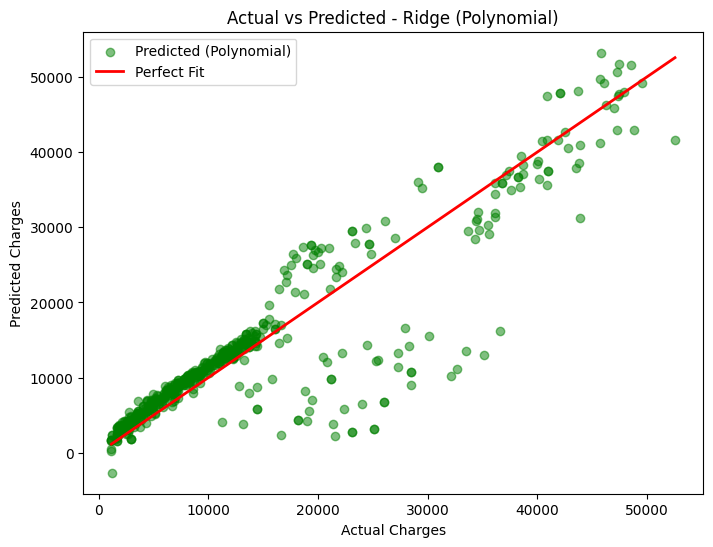

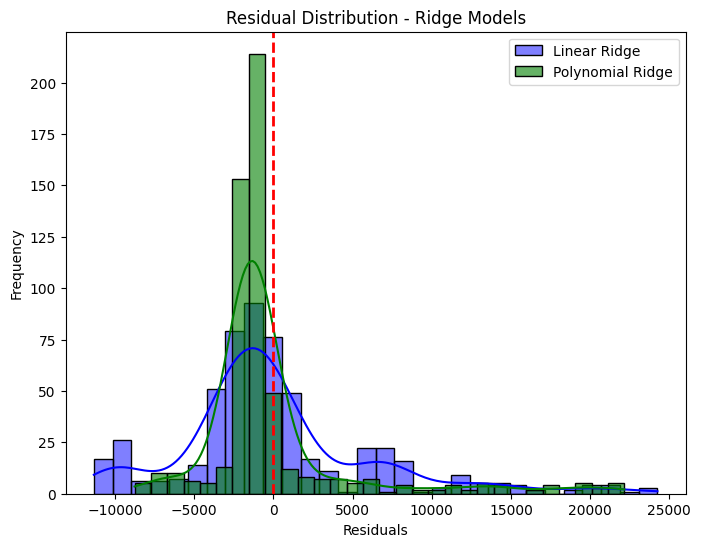

<ipython-input-13-864f8fae2ec0>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x="Feature", y="Coefficient", palette="coolwarm")


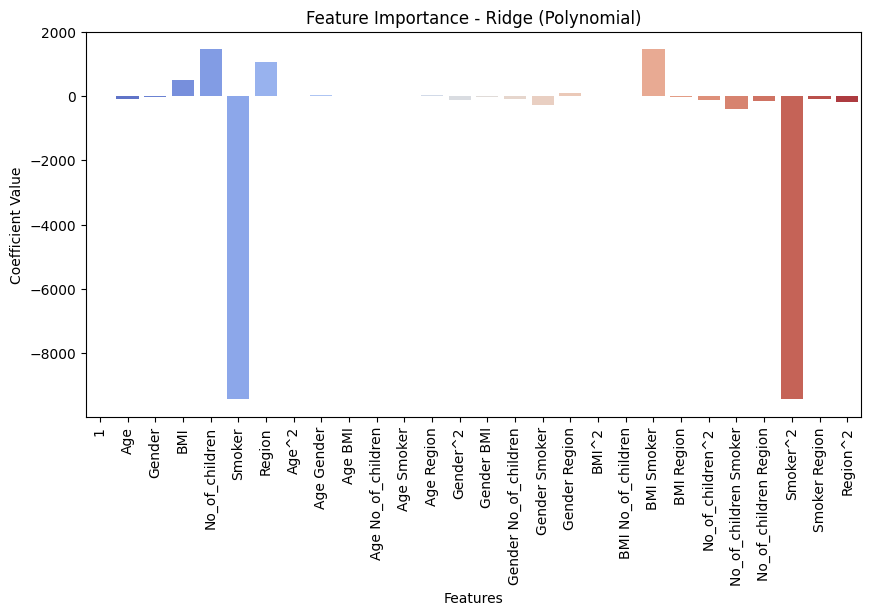

In [ ]:
# Split Data
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

# Ridge Regression (Linear)
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat_linear = RidgeModel.predict(x_test)

# Print R² Score
print(f'Linear Ridge R²: {r2_score(y_test, yhat_linear)}')

# Polynomial Features (Degree = 2)
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)

# Ridge Regression (Polynomial)
RidgeModel.fit(x_train_pr, y_train)
yhat_poly = RidgeModel.predict(x_test_pr)

# Print R² Score
print(f'Polynomial Ridge R²: {r2_score(y_test, yhat_poly)}')

### Visualization ###

## 1. Actual vs Predicted - Linear Ridge Model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, yhat_linear, color='blue', alpha=0.5, label="Predicted (Linear)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label="Perfect Fit")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted - Ridge (Linear)")
plt.legend()
plt.show()

## 2. Actual vs Predicted - Polynomial Ridge Model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, yhat_poly, color='green', alpha=0.5, label="Predicted (Polynomial)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label="Perfect Fit")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted - Ridge (Polynomial)")
plt.legend()
plt.show()

## 3. Residual Plot
residuals_linear = y_test - yhat_linear
residuals_poly = y_test - yhat_poly

plt.figure(figsize=(8, 6))
sns.histplot(residuals_linear, bins=30, kde=True, color='blue', label="Linear Ridge")
sns.histplot(residuals_poly, bins=30, kde=True, color='green', label="Polynomial Ridge", alpha=0.6)
plt.axvline(0, color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution - Ridge Models")
plt.legend()
plt.show()

## 4. Feature Importance (Polynomial Coefficients)
coefs = RidgeModel.coef_
features = pr.get_feature_names_out()

coef_df = pd.DataFrame({"Feature": features, "Coefficient": coefs})

plt.figure(figsize=(10, 5))
sns.barplot(data=coef_df, x="Feature", y="Coefficient", palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance - Ridge (Polynomial)")
plt.show()


---

# House Sales Cost Analysis


In [ ]:
# Load dataset from URL
file_name = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(file_name)

# Display first 5 rows
print(df.head())


   Unnamed: 0          id             date     price  bedrooms  bathrooms  \
0           0  7129300520  20141013T000000  221900.0       3.0       1.00   
1           1  6414100192  20141209T000000  538000.0       3.0       2.25   
2           2  5631500400  20150225T000000  180000.0       2.0       1.00   
3           3  2487200875  20141209T000000  604000.0       4.0       3.00   
4           4  1954400510  20150218T000000  510000.0       3.0       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0         1180      5650     1.0           0  ...      7        1180   
1         2570      7242     2.0           0  ...      7        2170   
2          770     10000     1.0           0  ...      6         770   
3         1960      5000     1.0           0  ...      7        1050   
4         1680      8080     1.0           0  ...      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955       

## Get the information from the dataset

In [ ]:
# Display data types
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


## Data Wrangling

In [ ]:
# Drop 'id' and 'Unnamed: 0' columns and describe dataset**
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)
print("Statistical summary after dropping columns:")
display(df.describe())

# Handling missing values**
print(f"Number of NaN values in 'bedrooms': {df['bedrooms'].isnull().sum()}")
print(f"Number of NaN values in 'bathrooms': {df['bathrooms'].isnull().sum()}")

# Replace missing values with the mean
df['bedrooms'].replace(np.nan, df['bedrooms'].mean(), inplace=True)
df['bathrooms'].replace(np.nan, df['bathrooms'].mean(), inplace=True)

print(f"NaN values in 'bedrooms' after replacement: {df['bedrooms'].isnull().sum()}")
print(f"NaN values in 'bathrooms' after replacement: {df['bathrooms'].isnull().sum()}")


Statistical summary after dropping columns:


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Number of NaN values in 'bedrooms': 13
Number of NaN values in 'bathrooms': 10
NaN values in 'bedrooms' after replacement: 0
NaN values in 'bathrooms' after replacement: 0


<ipython-input-16-a67862e23a2a>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].replace(np.nan, df['bedrooms'].mean(), inplace=True)
<ipython-input-16-a67862e23a2a>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

## Exploratory Data Analysis

📌 Number of houses with unique floor values:


,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


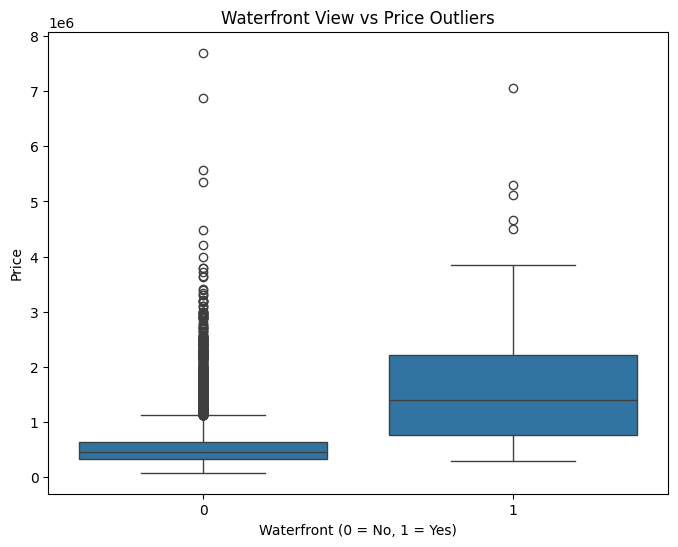

In [ ]:
# Count unique floor values**
floor_counts = df['floors'].value_counts().to_frame()
print("📌 Number of houses with unique floor values:")
display(floor_counts)

# Boxplot for waterfront vs price outliers**
plt.figure(figsize=(8, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title("Waterfront View vs Price Outliers")
plt.xlabel("Waterfront (0 = No, 1 = Yes)")
plt.ylabel("Price")
plt.show()

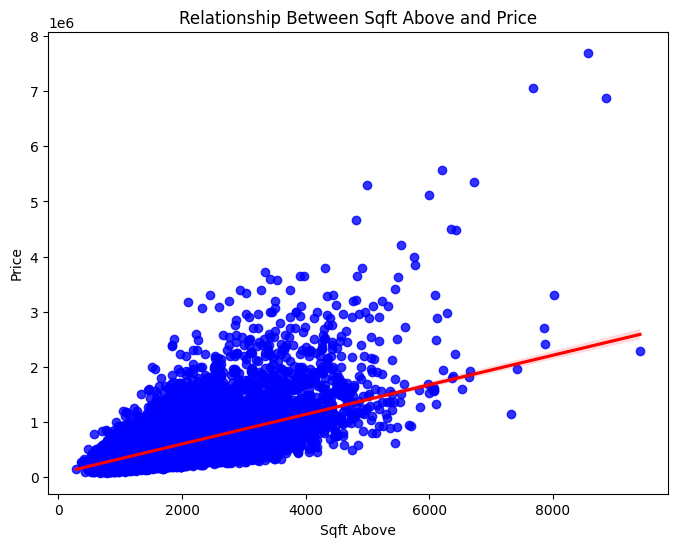

In [ ]:
# Seaborn Regplot for sqft_above vs price**
plt.figure(figsize=(8, 6))

# Scatter points with blue color, regression line with red color
sns.regplot(x=df['sqft_above'], y=df['price'], data=df,
            scatter_kws={'color': 'blue'},  # Blue color for points
            line_kws={'color': 'red'})  # Red color for regression line

plt.title("Relationship Between Sqft Above and Price")
plt.xlabel("Sqft Above")
plt.ylabel("Price")
plt.show()


In [ ]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Calculate correlation with 'price' and sort the values
correlation = df_numeric.corr()

# Display the correlation matrix
print(correlation)


                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308797   0.525738     0.702035  0.089661  0.256794   
bedrooms       0.308797  1.000000   0.514194     0.578077  0.032307  0.178022   
bathrooms      0.525738  0.514194   1.000000     0.755371  0.087929  0.502132   
sqft_living    0.702035  0.578077   0.755371     1.000000  0.172826  0.353949   
sqft_lot       0.089661  0.032307   0.087929     0.172826  1.000000 -0.005201   
floors         0.256794  0.178022   0.502132     0.353949 -0.005201  1.000000   
waterfront     0.266369 -0.006800   0.063744     0.103818  0.021604  0.023698   
view           0.397293  0.080058   0.188341     0.284611  0.074710  0.029444   
condition      0.036362  0.026690  -0.126197    -0.058753 -0.008958 -0.263768   
grade          0.667434  0.356589   0.664676     0.762704  0.113621  0.458183   
sqft_above     0.605567  0.479286   0.686309     0.876597  0.183512  0.523885   
sqft_basement  0.323816  0.3

In [ ]:
df_numeric = df.select_dtypes(include=['number'])  # Select only numeric columns
correlation = df_numeric.corr()['price'].sort_values()
print(correlation)


zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64


## Model Development

R^2 score: 0.00046769430149007363


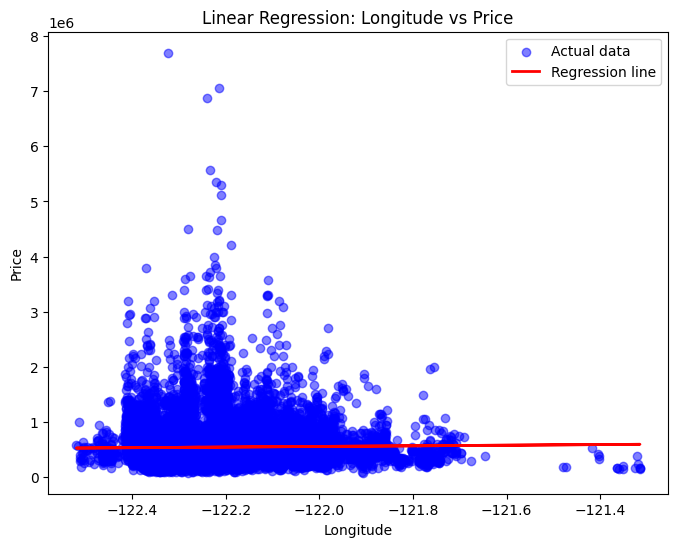

In [ ]:
# Select the feature 'long' and target 'price'
X = df[['long']]
Y = df['price']

# Create a Linear Regression model
lm = LinearRegression()

# Fit the model
lm.fit(X, Y)

# Calculate and print the R^2 score
r_squared = lm.score(X, Y)
print("R^2 score:", r_squared)

# Predict the values
y_pred = lm.predict(X)

# Plot the data and the linear regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', alpha=0.5, label='Actual data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')

# Add labels and title
plt.xlabel("Longitude")
plt.ylabel("Price")
plt.title("Linear Regression: Longitude vs Price")
plt.legend()
plt.show()


R^2 score: 0.4928532179037931


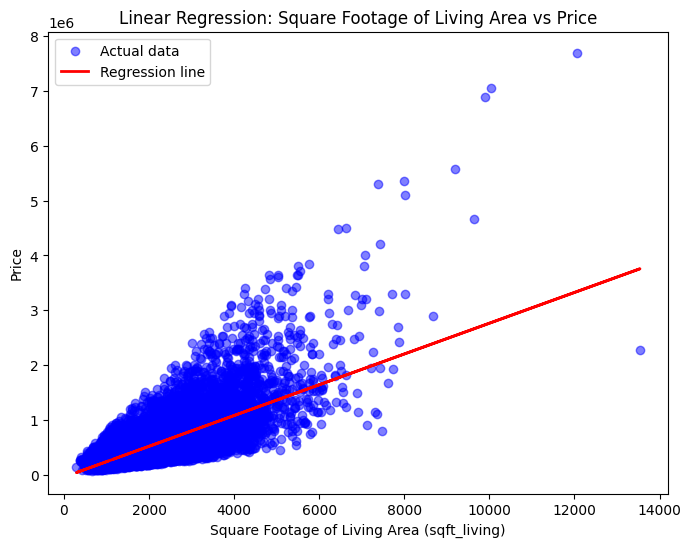

In [ ]:
# Select the feature 'sqft_living' and target 'price'
X = df[['sqft_living']]
Y = df['price']

# Create a Linear Regression model
lm = LinearRegression()

# Fit the model
lm.fit(X, Y)

# Calculate and print the R^2 score
r_squared = lm.score(X, Y)
print("R^2 score:", r_squared)

# Predict the values
y_pred = lm.predict(X)

# Plot the data and the linear regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', alpha=0.5, label='Actual data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')

# Add labels and title
plt.xlabel("Square Footage of Living Area (sqft_living)")
plt.ylabel("Price")
plt.title("Linear Regression: Square Footage of Living Area vs Price")
plt.legend()
plt.show()


R^2 score: 0.65769516660375


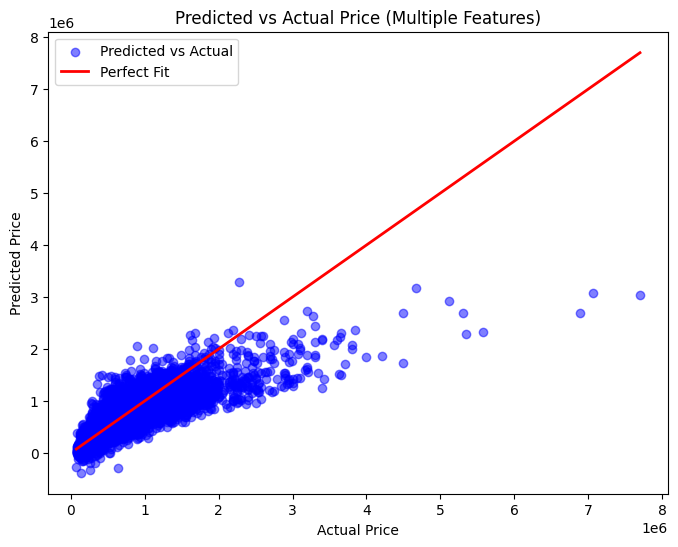

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Select the features and target
X = df[features]
Y = df['price']

# Create a Linear Regression model
lm = LinearRegression()

# Fit the model
lm.fit(X, Y)

# Calculate and print the R^2 score
r_squared = lm.score(X, Y)
print("R^2 score:", r_squared)

# Predict the values
y_pred = lm.predict(X)

# Plot Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(Y, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], color='red', linewidth=2, label="Perfect Fit")

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Price (Multiple Features)")
plt.legend()
plt.show()



R^2 score: 0.7117277926826987


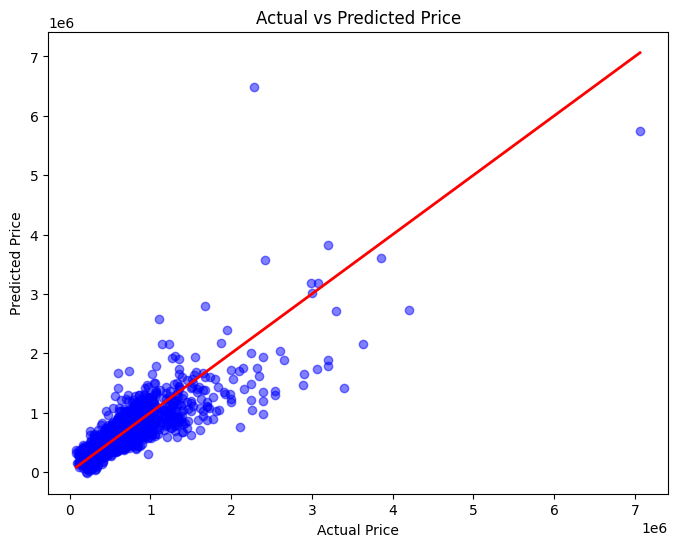

In [ ]:
# Define pipeline
Input = [('scale', StandardScaler()),
         ('polynomial', PolynomialFeatures(include_bias=False)),
         ('model', LinearRegression())]

# Create the pipeline
pipe = Pipeline(Input)

# Select the features and target
X = df[features]
Y = df['price']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

# Fit the pipeline on the training data
pipe.fit(x_train, y_train)

# Predict values
ypipe = pipe.predict(x_test)

# Print R^2 Score
print(f'R^2 score: {pipe.score(x_test, y_test)}')

## 1. Actual vs Predicted Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, ypipe, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Perfect Fit Line

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()


## Model Refinement

Linear Ridge R²: 0.6478759163939113
Polynomial Ridge R²: 0.7002744273539743


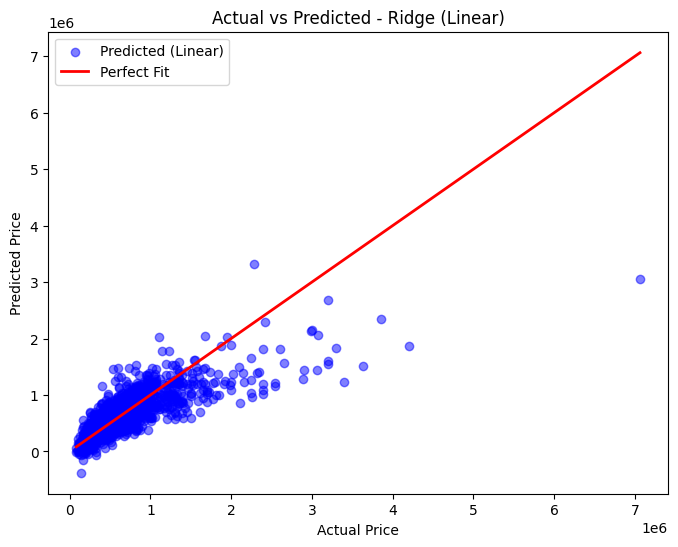

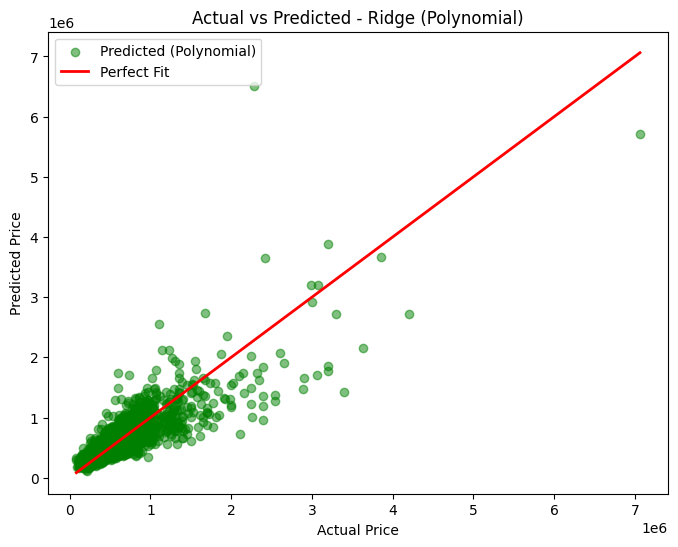

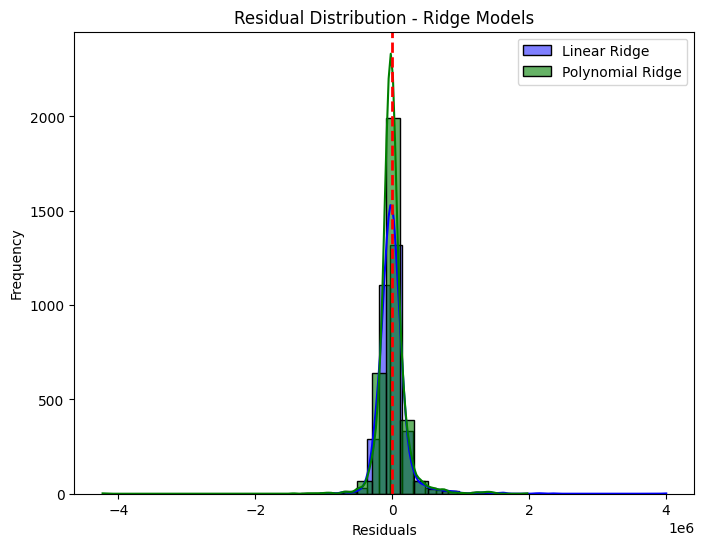

<ipython-input-25-5c347b840abe>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x="Feature", y="Coefficient", palette="coolwarm")


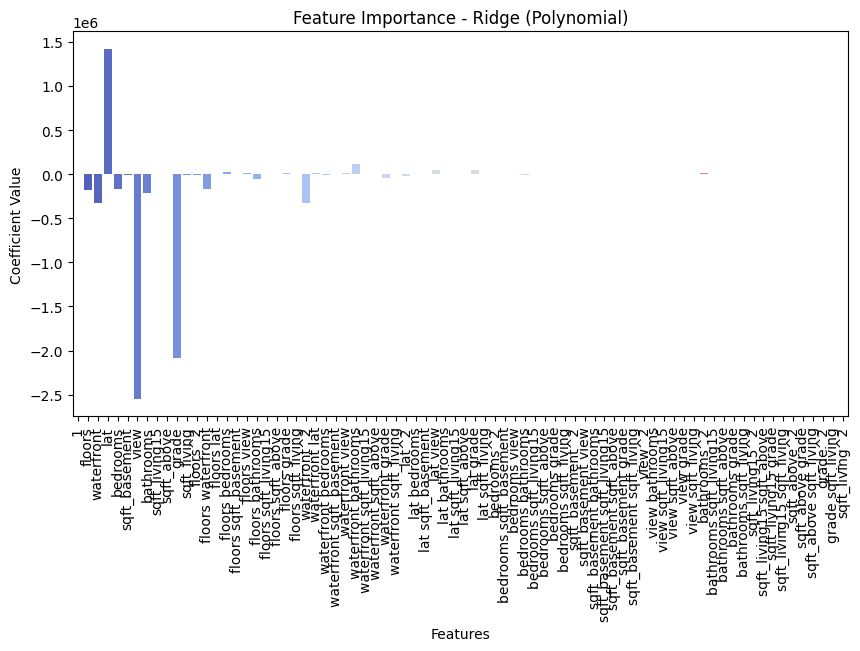

In [ ]:
# Split Data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

# Ridge Regression (Linear)
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat_linear = RidgeModel.predict(x_test)

# Print R² Score
print(f'Linear Ridge R²: {r2_score(y_test, yhat_linear)}')

# Polynomial Features (Degree = 2)
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)

# Ridge Regression (Polynomial)
RidgeModel.fit(x_train_pr, y_train)
yhat_poly = RidgeModel.predict(x_test_pr)

# Print R² Score
print(f'Polynomial Ridge R²: {r2_score(y_test, yhat_poly)}')

### Visualization ###

## 1. Actual vs Predicted - Linear Ridge Model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, yhat_linear, color='blue', alpha=0.5, label="Predicted (Linear)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label="Perfect Fit")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted - Ridge (Linear)")
plt.legend()
plt.show()

## 2. Actual vs Predicted - Polynomial Ridge Model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, yhat_poly, color='green', alpha=0.5, label="Predicted (Polynomial)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label="Perfect Fit")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted - Ridge (Polynomial)")
plt.legend()
plt.show()

## 3. Residual Plot
residuals_linear = y_test - yhat_linear
residuals_poly = y_test - yhat_poly

plt.figure(figsize=(8, 6))
sns.histplot(residuals_linear, bins=30, kde=True, color='blue', label="Linear Ridge")
sns.histplot(residuals_poly, bins=30, kde=True, color='green', label="Polynomial Ridge", alpha=0.6)
plt.axvline(0, color='red', linestyle='dashed', linewidth=2)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution - Ridge Models")
plt.legend()
plt.show()

## 4. Feature Importance (Polynomial Coefficients)
coefs = RidgeModel.coef_
features_poly = pr.get_feature_names_out()

coef_df = pd.DataFrame({"Feature": features_poly, "Coefficient": coefs})

plt.figure(figsize=(10, 5))
sns.barplot(data=coef_df, x="Feature", y="Coefficient", palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance - Ridge (Polynomial)")
plt.show()
